In [1]:
import csv 
 
import numpy as np 
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from sklearn.cluster import MeanShift, estimate_bandwidth

In [3]:
# Load data from input file 
input_file = 'sales.csv' 
file_reader = csv.reader(open(input_file, 'r'), delimiter=',') 

In [4]:
X = [] 
for count, row in enumerate(file_reader): 
    if not count: 
        names = row[1:] 
        continue 
 
    X.append([float(x) for x in row[1:]]) 
 
# Convert to numpy array 
X = np.array(X) 

In [7]:
X.shape

(440, 6)

In [14]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Estimating the bandwidth of input data
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=len(X))

In [15]:
bandwidth

12469.110735177452

In [16]:
# Compute clustering with MeanShift
meanshift_model = MeanShift(bandwidth=bandwidth, bin_seeding=True)
meanshift_model.fit(X)

MeanShift(bandwidth=12469.110735177452, bin_seeding=True, cluster_all=True,
     min_bin_freq=1, n_jobs=1, seeds=None)

In [17]:
labels = meanshift_model.labels_
cluster_centers = meanshift_model.cluster_centers_
num_clusters = len(np.unique(labels))

print("\nNumber of clusters in input data =", num_clusters)


Number of clusters in input data = 16


In [19]:
names

['Tshirt', 'Tank top', 'Halter top', 'Turtleneck', 'Tube top', 'Sweater']

In [18]:
print("\nCenters of clusters:")
print('\t'.join([name[:3] for name in names]))
for cluster_center in cluster_centers:
    print('\t'.join([str(int(x)) for x in cluster_center]))


Centers of clusters:
Tsh	Tan	Hal	Tur	Tub	Swe
7696	3426	4540	2225	1468	1015
68560	3908	9980	12750	794	1804
18106	1283	22450	5128	4089	14762
38741	40539	20120	35059	255	50710
28333	34263	24065	5575	4229	18076
22617	77873	32543	1005	21035	837
104972	29186	19415	16016	5060	9372
10306	3294	1956	38106	67	2757
21417	8727	35953	42	13453	4135
14987	46397	97393	1127	37315	3235
7852	4939	63081	134	40066	1332
42032	49822	58556	7085	22688	6081
35314	16745	12775	66900	1298	5613
86	21109	46969	36	22724	1497
41204	5525	8119	6457	1576	14621
35147	38576	53761	2976	26660	2170


In [20]:
# Extract two features for visualization 
cluster_centers_2d = cluster_centers[:, 1:3]

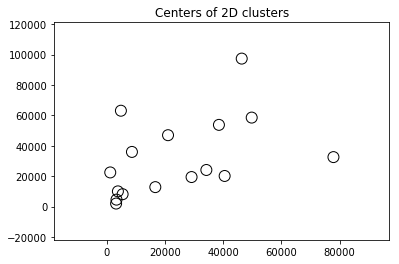

In [21]:
plt.figure()
plt.scatter(cluster_centers_2d[:,0], cluster_centers_2d[:,1], 
        s=120, edgecolors='black', facecolors='none')

offset = 0.25
plt.xlim(cluster_centers_2d[:,0].min() - offset * cluster_centers_2d[:,0].ptp(),
        cluster_centers_2d[:,0].max() + offset * cluster_centers_2d[:,0].ptp(),)
plt.ylim(cluster_centers_2d[:,1].min() - offset * cluster_centers_2d[:,1].ptp(),
        cluster_centers_2d[:,1].max() + offset * cluster_centers_2d[:,1].ptp())

plt.title('Centers of 2D clusters')
plt.show()

In [23]:
meanshift_model.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 14,  2,  2,  0,  0,
        0,  0,  0,  0,  0, 14,  4,  2,  0,  0,  0,  8, 14,  0,  0,  0, 14,
        0,  0, 14,  0,  0,  1, 14,  0,  0,  0,  0,  8,  0, 11,  0, 13,  0,
        0, 14,  0,  0,  0, 13,  0,  0,  0,  0, 15,  0,  0,  0, 13,  0,  0,
        0,  0,  0,  2,  0,  0,  0,  0,  0,  8,  0,  0,  0,  0,  0,  0,  0,
        9,  5, 14,  0,  0,  0,  0, 13,  7,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  1,  0,  0,  0,  0,  0,  8,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, 14,  1,  0,  0,  0, 14,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, 14, 14,  0,  0,  8,  0,  0,  0, 14,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  8,  0,  2,  0,  0,  0,  0,
        0, 13,  0,  0,  0,  0, 14,  0,  0,  0,  0,  6,  0,  3,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, 14,  0,  0,  0,  0,  8, 14,  0,
        0,  0,  0,  0,  0,  0,  0, 13,  0,  0,  0,  0, 13,  0,  0,  0,  0,
        0,  0,  0,  0,  0